In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler


In [3]:
iris = load_iris()
x=iris.data
y=iris.target
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)


In [4]:
from sklearn.decomposition import PCA


In [5]:
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x_scaled)
explained_variance=pca.explained_variance_ratio_
print(explained_variance)

[0.72962445 0.22850762]


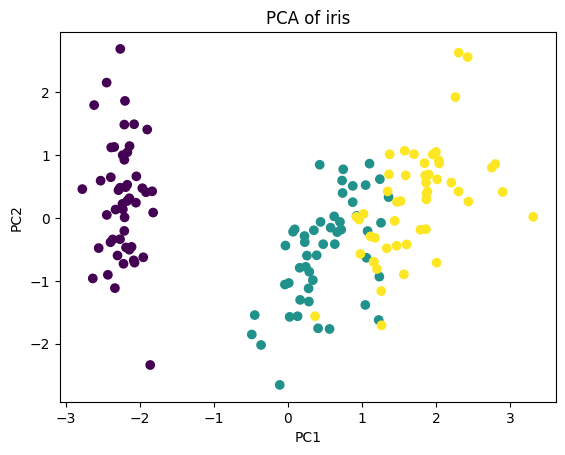

In [7]:
import matplotlib.pyplot as plt
plt.scatter(x_pca[:,0],x_pca[:,1],c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of iris')
plt.show()

In [20]:
import numpy as np

In [21]:
np.random.seed(0)
X=np.linspace(0,10,100)
y=np.sin(X)+0.5* np.random.randn(100)
X=X.reshape(-1,1)

In [23]:
from sklearn.metrics.pairwise import euclidean_distances
def gauss_kernel(u):
    return np.exp(-0.5 * u**2) / np.sqrt(2*np.pi)

def kernel_regression(X_train, y_train , X_eval , h=0.5):
    y_pred=[]
    for x0 in X_eval:
        distance = (x0 - X_train)/h
        weights = gauss_kernel(distance)
        y_hat=np.sum(weights * y_train)/np.sum(weights)
        y_pred.append(y_hat)
    return np.array(y_pred)

y_pred = kernel_regression(X,y,X,h=0.5)

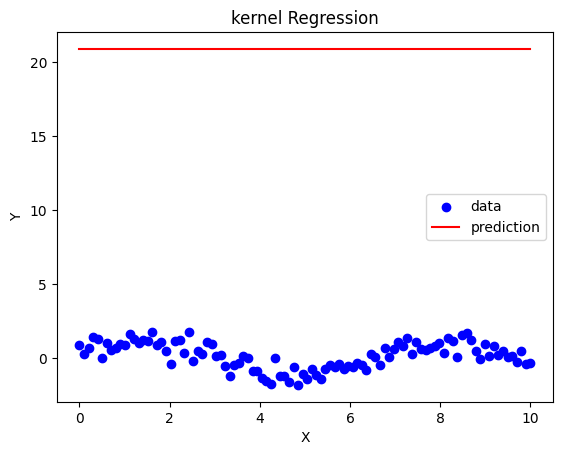

In [24]:
plt.scatter(X,y,color='blue',label='data')
plt.plot(X,y_pred,color='red',label='prediction')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('kernel Regression')
plt.legend()
plt.show()